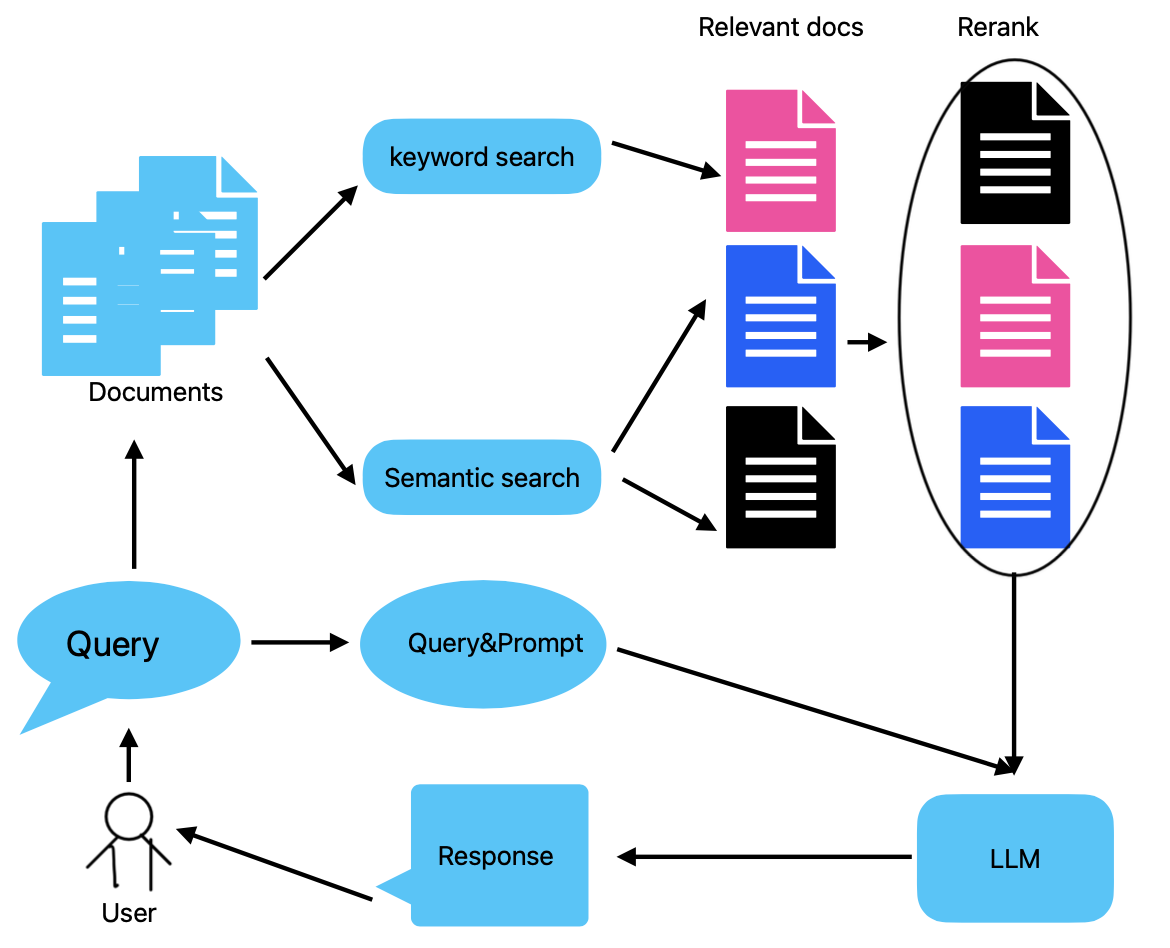

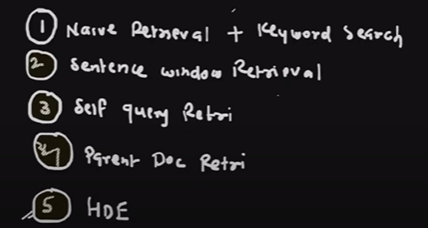

In [1]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [2]:

# Sample documents
documents = [
    "This is a list which containig sample documents.",
    "Keywords are important for keyword-based search.",
    "Document analysis involves extracting keywords.",
    "Keyword-based search relies on sparse embeddings."
]

In [3]:

query="keyword-based search"

In [4]:

import re
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    return text


In [5]:
preprocess_documents=[preprocess_text(doc) for doc in documents]

In [6]:

preprocess_documents

['this is a list which containig sample documents',
 'keywords are important for keywordbased search',
 'document analysis involves extracting keywords',
 'keywordbased search relies on sparse embeddings']

In [8]:

for doc in preprocess_documents:
    print(doc)

this is a list which containig sample documents
keywords are important for keywordbased search
document analysis involves extracting keywords
keywordbased search relies on sparse embeddings


In [9]:
query

'keyword-based search'

In [10]:

preprocessed_query = preprocess_text(query)

In [11]:
preprocessed_query

'keywordbased search'

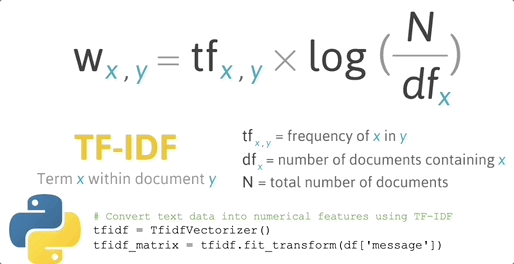

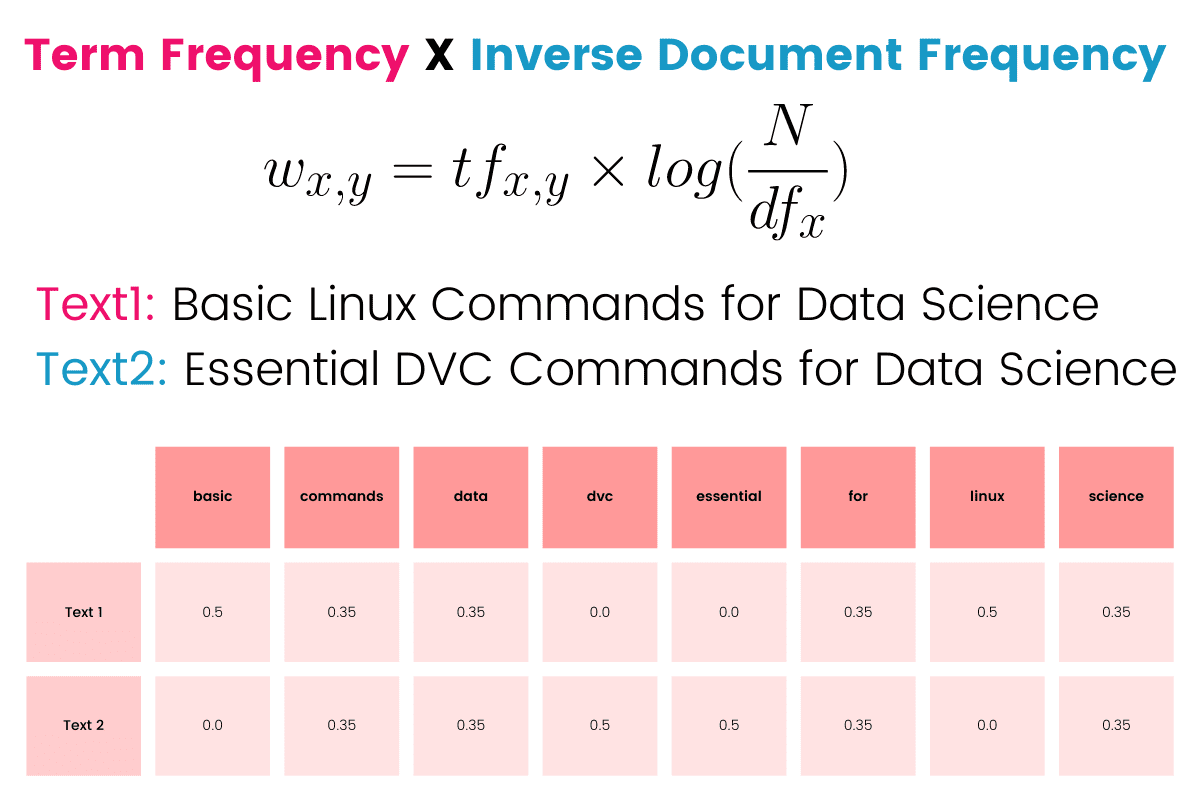

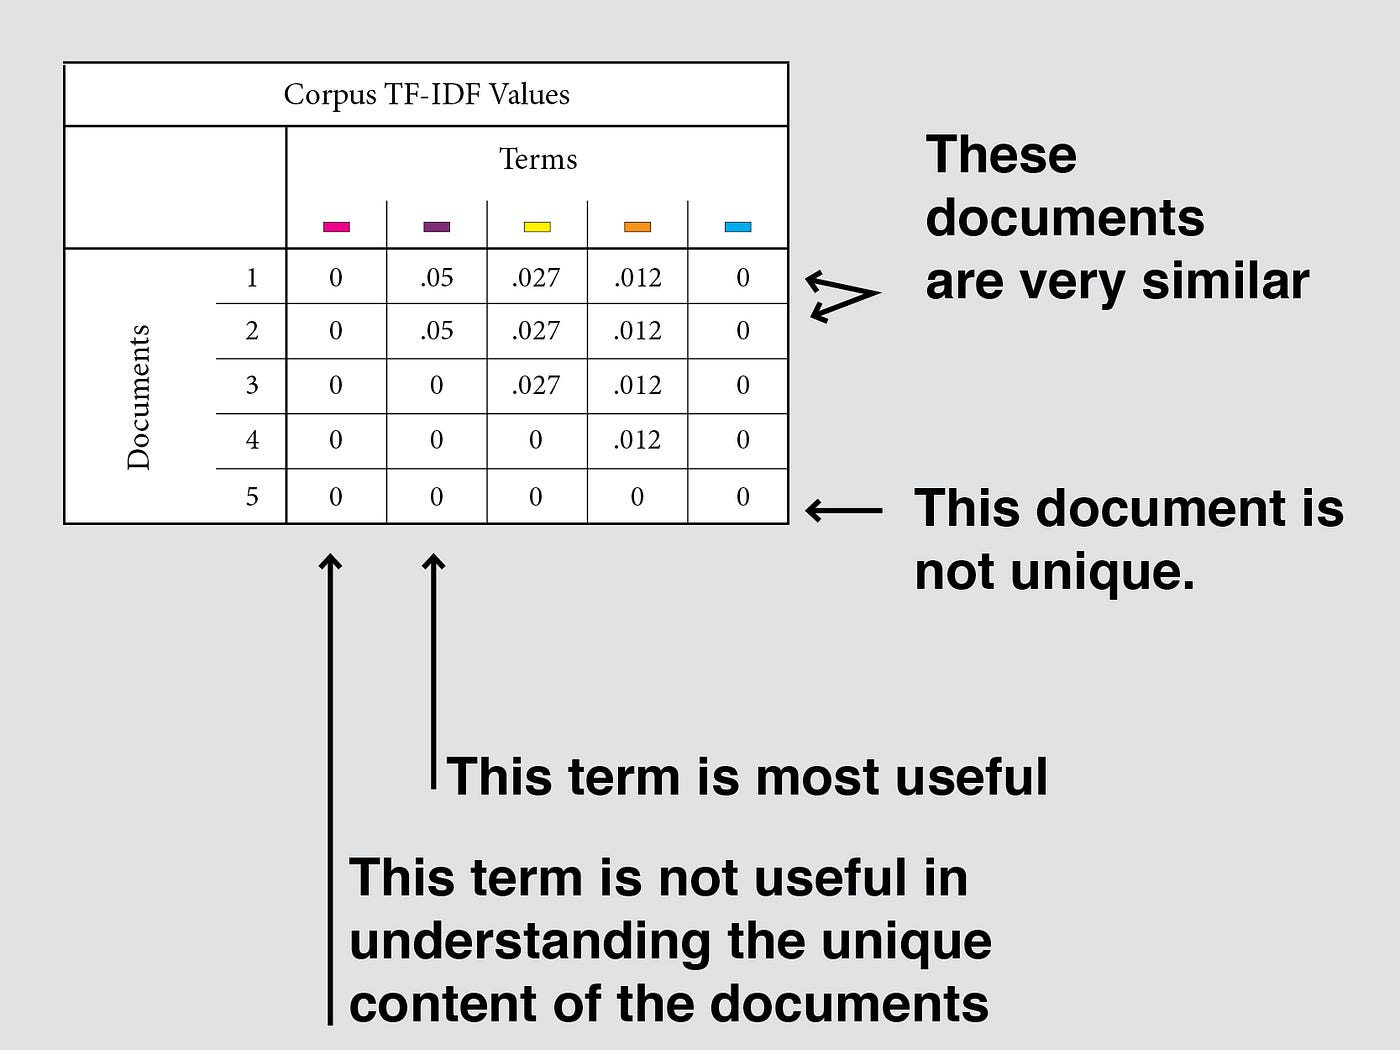

In [12]:
vector=TfidfVectorizer()

In [13]:


X=vector.fit_transform(preprocess_documents)

In [15]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 24 stored elements and shape (4, 21)>

In [14]:

X.toarray()

array([[0.        , 0.        , 0.37796447, 0.        , 0.37796447,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.37796447, 0.        , 0.        , 0.37796447, 0.        ,
        0.        , 0.37796447, 0.        , 0.        , 0.37796447,
        0.37796447],
       [0.        , 0.4533864 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.4533864 , 0.4533864 , 0.        ,
        0.        , 0.35745504, 0.35745504, 0.        , 0.        ,
        0.        , 0.        , 0.35745504, 0.        , 0.        ,
        0.        ],
       [0.46516193, 0.        , 0.        , 0.46516193, 0.        ,
        0.        , 0.46516193, 0.        , 0.        , 0.46516193,
        0.        , 0.        , 0.36673901, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.43671931, 0.        , 0.        , 0.       

In [22]:
X.toarray().shape

(4, 21)

In [16]:
X.toarray()[0] # documents embedding vector A 

array([0.        , 0.        , 0.37796447, 0.        , 0.37796447,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.37796447, 0.        , 0.        , 0.37796447, 0.        ,
       0.        , 0.37796447, 0.        , 0.        , 0.37796447,
       0.37796447])

In [17]:
query_embedding=vector.transform([preprocessed_query])

In [18]:

query_embedding.toarray() # query_embedding vector B

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.70710678, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.70710678, 0.        , 0.        ,
        0.        ]])

In [23]:
query_embedding.toarray().shape

(1, 21)

cos theta = (A dot B ) / |A| |B|

In [19]:
similarities = cosine_similarity(X, query_embedding)

In [20]:
similarities

array([[0.        ],
       [0.50551777],
       [0.        ],
       [0.48693426]])

In [21]:
np.argsort(similarities,axis=0) # ascending similarity ordering of documents with query_embedding

array([[0],
       [2],
       [3],
       [1]], dtype=int64)

In [24]:

#Ranking
ranked_indices=np.argsort(similarities,axis=0)[::-1] # reverse (here descending)

In [26]:
ranked_indices.flatten()

array([1, 3, 2, 0], dtype=int64)

In [27]:
ranked_documents = [documents[i] for i in ranked_indices.flatten()]

In [28]:
ranked_documents

['Keywords are important for keyword-based search.',
 'Keyword-based search relies on sparse embeddings.',
 'Document analysis involves extracting keywords.',
 'This is a list which containig sample documents.']

semantic search for documents

In [29]:
document_embeddings = np.array([
    [0.634, 0.234, 0.867, 0.042, 0.249],
    [0.123, 0.456, 0.789, 0.321, 0.654],
    [0.987, 0.654, 0.321, 0.123, 0.456]
])

In [30]:
query_embedding = np.array([[0.789, 0.321, 0.654, 0.987, 0.123]])

In [31]:
similarities = cosine_similarity(document_embeddings, query_embedding)

In [32]:
similarities

array([[0.73558979],
       [0.67357898],
       [0.71517305]])

In [33]:

ranked_indices = np.argsort(similarities, axis=0)[::-1].flatten()

In [34]:
ranked_indices

array([0, 2, 1], dtype=int64)

In [35]:
for i, idx in enumerate(ranked_indices):
    print(f"Rank {i+1}: Document {idx+1}")

Rank 1: Document 1
Rank 2: Document 3
Rank 3: Document 2


In [36]:

from langchain_community.document_loaders import PyPDFLoader

In [39]:
doc_path="content/data2/pinn2.pdf"

In [40]:

loader=PyPDFLoader(doc_path)

In [41]:

docs=loader.load()

In [42]:

from langchain.text_splitter import RecursiveCharacterTextSplitter

In [43]:

splitter = RecursiveCharacterTextSplitter(chunk_size=200,chunk_overlap=30)

In [44]:

chunks = splitter.split_documents(docs)

In [45]:
chunks

[Document(metadata={'source': 'content/data2/pinn2.pdf', 'page': 0}, page_content='Research article\nBalance equations for physics-informed machine learning\nSandor M. Molnar\na , #\n, Joseph Godfrey\nb , *\n, Binyang Song\nc\na'),
 Document(metadata={'source': 'content/data2/pinn2.pdf', 'page': 0}, page_content='b , *\n, Binyang Song\nc\na\nInstitute of Astronomy and Astrophysics, Academia Sinica, Taipei, Taiwan, Republic of China\nb\nVirginia Tech, Falls Church, VA, USA\nc\nVirginia Tech, Blacksburg, VA, USA'),
 Document(metadata={'source': 'content/data2/pinn2.pdf', 'page': 0}, page_content='ARTICLE INFO\nKeywords:\nComputational methodologies\nMachine learning\nPhysics-informed systems\nBalance equations\nFluid dynamics\nElasticity\nElectrodynamics\nThermodynamics\nABSTRACT'),
 Document(metadata={'source': 'content/data2/pinn2.pdf', 'page': 0}, page_content='Thermodynamics\nABSTRACT\nUsing traditional machine learning (ML) methods may produce results that are inconsistent with'),
 

In [46]:
from langchain.embeddings import HuggingFaceInferenceAPIEmbeddings

In [47]:
import os
from dotenv import load_dotenv
load_dotenv()

HF_TOKEN = os.getenv("HUGGINGFACE_TOKEN")

In [48]:

embeddings = HuggingFaceInferenceAPIEmbeddings(api_key=HF_TOKEN, model_name="BAAI/bge-base-en-v1.5")

In [49]:
from langchain.vectorstores import Chroma

In [50]:

vectorstore=Chroma.from_documents(chunks,embeddings) # inmemory vector stores

In [51]:
vectorstore_retreiver = vectorstore.as_retriever(search_kwargs={"k": 3}) # top 3

semantic retrievar create embeddings using neural network encoder

In [52]:
vectorstore_retreiver

VectorStoreRetriever(tags=['Chroma', 'HuggingFaceInferenceAPIEmbeddings'], vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x0000018404FEA210>, search_kwargs={'k': 3})

In [53]:
from langchain.retrievers import BM25Retriever, EnsembleRetriever

keyword_retriever = BM25Retriever of tfidf

In [54]:
keyword_retriever = BM25Retriever.from_documents(chunks)

In [55]:
keyword_retriever.k =  3

combined retrievar  ( attention head )

In [56]:
ensemble_retriever = EnsembleRetriever(retrievers=[vectorstore_retreiver,keyword_retriever],weights=[0.3, 0.7])

In [57]:
ensemble_retriever

EnsembleRetriever(retrievers=[VectorStoreRetriever(tags=['Chroma', 'HuggingFaceInferenceAPIEmbeddings'], vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x0000018404FEA210>, search_kwargs={'k': 3}), BM25Retriever(vectorizer=<rank_bm25.BM25Okapi object at 0x00000184086676D0>, k=3)], weights=[0.3, 0.7])

Mixing vector search and keyword search for Hybrid search

hybrid_score = (1 — alpha) * sparse_score + alpha * dense_score   

 ( attention head)

In [ ]:
# This equation calculates a hybrid score by combining two types of scores: sparse and dense.
# Breakdown:
# sparse_score: Typically represents the score from a sparse retrieval model, such as a BM25 or TF-IDF-based model.
# dense_score: Represents the score from a dense retrieval model, such as a neural network-based model.
# alpha: A hyperparameter that controls the weight of the dense score in the hybrid score. A value of 0 would give all weight to the sparse score, while a value of 1 would give all weight to the dense score.
# (1 - alpha) * sparse_score: Calculates the weighted sparse score.
# alpha * dense_score: Calculates the weighted dense score.
# hybrid_score = ...: Combines the weighted sparse and dense scores to produce the final hybrid score.
# Purpose:
# This hybrid approach aims to leverage the strengths of both sparse and dense retrieval models. Sparse models are often good at capturing exact keyword matches, while dense models can capture semantic relationships and nuances in language. By combining these two approaches, the hybrid score can provide a more comprehensive and accurate ranking of results.

In [58]:
model_name = "HuggingFaceH4/zephyr-7b-beta"

cuda required

In [69]:
import torch
from transformers import ( AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig, pipeline, )
from langchain import HuggingFacePipeline

Quantization

Quantization is a technique to reduce the computational and memory costs of running inference by representing the weights and activations with low-precision data types like 8-bit integer (int8) instead of the usual 32-bit floating point (float32).

Reducing the number of bits means the resulting model requires less memory storage, consumes less energy (in theory), and operations like matrix multiplication can be performed much faster with integer arithmetic. It also allows to run models on embedded devices, which sometimes only support integer data types.

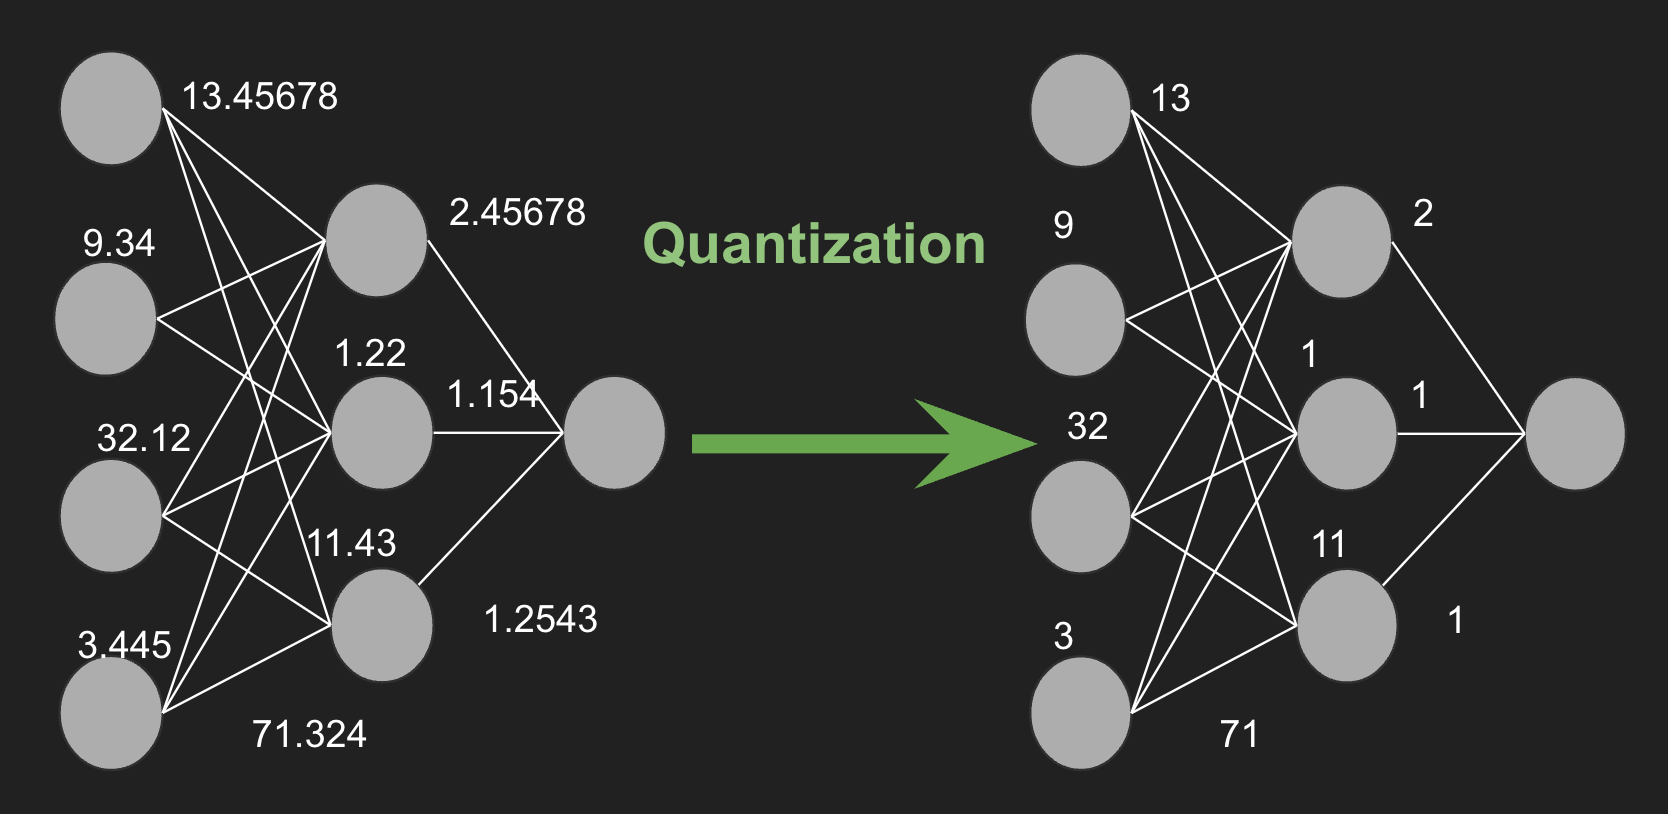

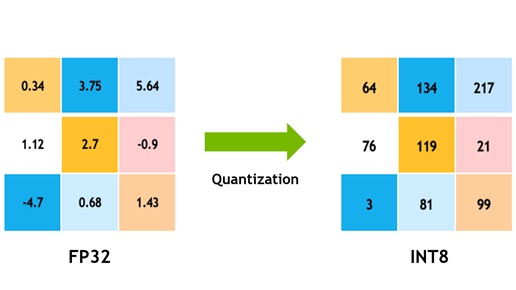

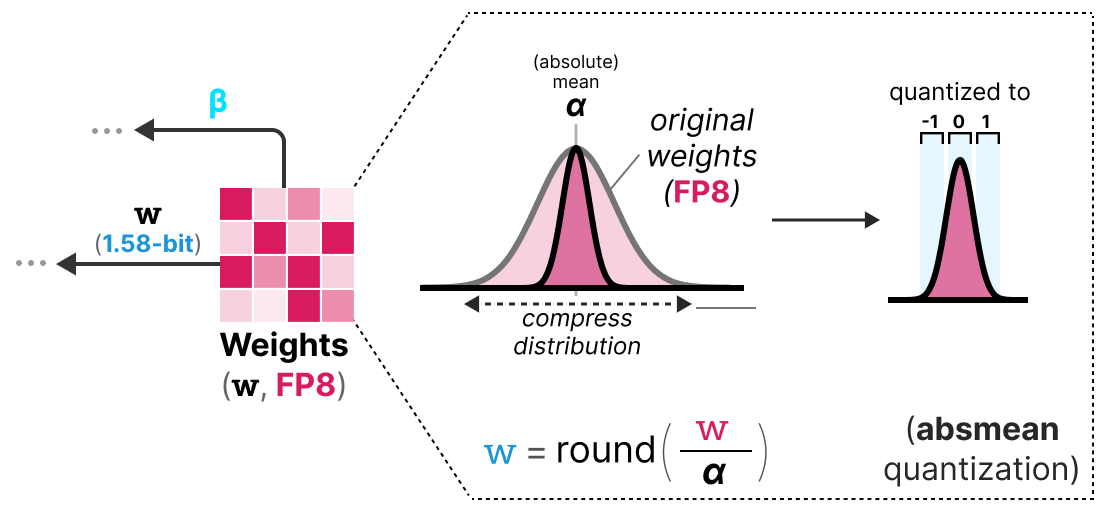

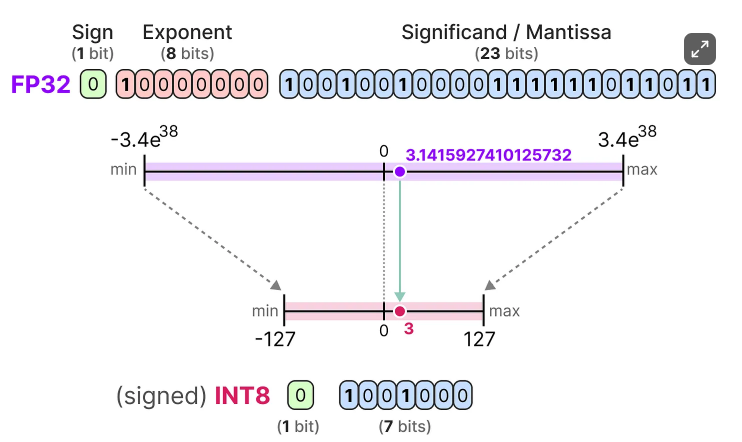

fp16 to int4

In [61]:

# function for loading 4-bit quantized model
def load_quantized_model(model_name: str):
    """
    model_name: Name or path of the model to be loaded.
    return: Loaded quantized model.
    """
    bnb_config = BitsAndBytesConfig(
        load_in_4bit=True, # int4
        bnb_4bit_use_double_quant=True,
        bnb_4bit_quant_type="nf4",
        bnb_4bit_compute_dtype=torch.bfloat16,
    )

    model = AutoModelForCausalLM.from_pretrained(
        model_name,
        torch_dtype=torch.bfloat16,
        quantization_config=bnb_config,
        # cache_dir=""
    )
    return model

In [ ]:
# model_name: The name or path of the model to be loaded.
# Functionality:
# Configuring Quantization: The function starts by defining a BitsAndBytesConfig object, which specifies the quantization settings:
# load_in_4bit=True: Loads the model in 4-bit quantization.
# bnb_4bit_use_double_quant=True: Enables double quantization for 4-bit models.
# bnb_4bit_quant_type="nf4": Specifies the quantization type as "nf4" (4-bit floating-point).
# bnb_4bit_compute_dtype=torch.bfloat16: Sets the compute data type to torch.bfloat16 (16-bit floating-point).
# Loading the Model: The function then loads the quantized model using AutoModelForCausalLM.from_pretrained:
# model_name: The name or path of the model to be loaded.
# torch_dtype=torch.bfloat16: Specifies the data type for the model's weights and activations.
# quantization_config=bnb_config: Applies the quantization configuration defined earlier.
# Returning the Loaded Model: Finally, the function returns the loaded quantized model.
# Purpose:
# This function enables the loading of quantized models, which can provide significant memory and computational efficiency improvements, especially for large language models. The BitsAndBytes library is used to configure and apply quantization to the model.

In [63]:
# initializing tokenizer
def initialize_tokenizer(model_name: str):
    """
    model_name: Name or path of the model for tokenizer initialization.
    return: Initialized tokenizer.
    """
    tokenizer = AutoTokenizer.from_pretrained(model_name, return_token_type_ids=False)
    tokenizer.bos_token_id = 1  # Set beginning of sentence token id
    return tokenizer

In [62]:
# The tokenizer is a crucial component in Natural Language Processing (NLP) pipelines.
# Purpose:
# A tokenizer's primary function is to split text into individual words or subwords, known as tokens. This process is essential for preparing text data for use in machine learning models.
# Types of Tokenizers:
# Word-level Tokenizers: Split text into individual words.
# Subword Tokenizers: Split words into subwords, allowing for more efficient handling of out-of-vocabulary (OOV) words.
# Token Encoding: Maps tokens to numerical representations.

In [64]:
tokenizer = initialize_tokenizer(model_name)

tokenizer_config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

d:\a27_YEARS_OLD\multimodal_rag\venv\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\lenovo\.cache\huggingface\hub\models--HuggingFaceH4--zephyr-7b-beta. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

In [70]:
model = load_quantized_model(model_name)

CUDA is required but not available for bitsandbytes. Please consider installing the multi-platform enabled version of bitsandbytes, which is currently a work in progress. Please check currently supported platforms and installation instructions at https://huggingface.co/docs/bitsandbytes/main/en/installation#multi-backend


RuntimeError: CUDA is required but not available for bitsandbytes. Please consider installing the multi-platform enabled version of bitsandbytes, which is currently a work in progress. Please check currently supported platforms and installation instructions at https://huggingface.co/docs/bitsandbytes/main/en/installation#multi-backend

set model cache dir in collab quantized the model then download and save model in local cache

In [66]:
import transformers

In [67]:
transformers.__version__

'4.47.1'

In [ ]:
model_path = "llm/model"
model = AutoModelForCausalLM.from_pretrained(model_path)

In [ ]:

pipeline = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    use_cache=True,
    device_map="auto",
    max_length=2048,
    do_sample=True,
    top_k=5,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,
    pad_token_id=tokenizer.pad_token_id,
)

In [ ]:
llm = HuggingFacePipeline(pipeline=pipeline)

In [ ]:

from langchain.chains import RetrievalQA

In [ ]:
normal_chain = RetrievalQA.from_chain_type(
    llm=llm, chain_type="stuff", retriever=vectorstore_retreiver
)

In [ ]:
hybrid_chain = RetrievalQA.from_chain_type(
    llm=llm, chain_type="stuff", retriever=ensemble_retriever
)

In [ ]:
response1 = normal_chain.invoke("What is Physics informed neural network ?")

In [ ]:

response1